# Linear regression
**Supervised learning: regression**

**Goal:** Fit an ols linear regression model to randomly generated $(X, y)$ data.

**Why ols?** In a higher dimensional space, a regression hyperplane aims at summarizing the true relationship between the response, $y$, and the features, $X$, and disregard any random noise that is not part of that relationship. In math terms: $y \approx X \beta + \epsilon$. 

There are different routes one could take to fit the regression hyperplane into the data. Eyeballing being one of them. Ordinary least squares (ols) minimizes the euclidean distance between the fitted response, $\hat{y}$, and the observed response, $y$. So essentially the difference between what our model says ($\hat{y} \equiv X \beta$) and what we see in the data. This difference $\hat{y}_i - y_i$ $\forall$ $i$ is the error or "residual" for each observation $i$. And what ols minimizes is the sum of squares of all residuals (SSR). Again in math: we pick the model parameters $\beta^*$ that minimize the SSR $\|X \beta - y\|_2^2$. 

As it turns out, minimizing SSR is equivalent to fitting the regression hyperplane via maximum likelihood. I won't bother to prove that here. Plenty of people smarter than me have already done that out there. Just google it. Resources are plenty.

**Loads.**

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
%matplotlib inline

**Create & plot data.** For this example we create a random dataset of $n=$ 500 observations and $p=$ 2 features, $x_0$ and $x_1$. This leads to a feature matrix $X \in \mathbb{R}^{nxp}$ and a response vector $y \in \mathbb{R}^{n}$.

In terms of visualization here we show a 2D and a 3D representation of the data. This should drive home the fact that the human brain has a harder time making sense of higher dimensions. Just pick one $(x_{0i},x_{1i})$ data point and see in which of the graphs you can tell the corresponding $y$ value. (Of couse I'm making your life easy with the colors). :)

In [2]:
# Call on numpy's pseudo random number generator
rng = np.random.RandomState(42)

# Training data
# Create feature matrix
X = rng.randn(500, 2)
x0, x1 = X[:, 0], X[:, 1]
# Create response vector with  y varying along the [-2.5, .8]X plane
y = np.dot(X, [-2.5, .8]) + 2 * rng.randn(X.shape[0])

# Test data
X_test = rng.randn(100, 2)
x0_test, x1_test = X_test[:, 0], X_test[:, 1]

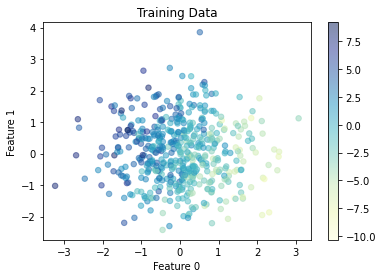

In [3]:
# Viz 2D scatterplot
sc = plt.scatter(x0, x1, c=y, s=30, alpha=.5, cmap='YlGnBu')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Training Data')
plt.colorbar(sc)

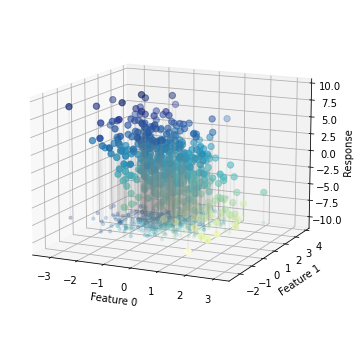

In [4]:
# Viz 3D space
fig = plt.figure(figsize=(6, 6))
# 3D projection
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x0, x1, y, c=y, s=40,cmap='YlGnBu')
# Add initial scatterplot to x0, x1 flat space
ax.scatter(x0, x1, -8 + np.zeros(X.shape[0]), c=y, s=10, cmap='YlGnBu', alpha=.2)
ax.set(xlabel='Feature 0', ylabel='Feature 1', zlabel='Response')
ax.view_init(13, -65)
# Add connecting lines
pts = np.hstack([X, y[:, None]]).reshape(-1, 1, 3)
segs = np.hstack([pts, pts])
segs[:, 0, 2] = -8
ax.add_collection3d(Line3DCollection(segs, colors='gray', alpha=.1))

**Train model & visualize fit.**

In [5]:
# Create & train model
ols = LinearRegression()
ols.fit(X, y)

LinearRegression()

[Text(0.5, 0, 'Feature 0'), Text(0, 0.5, 'Feature 1')]

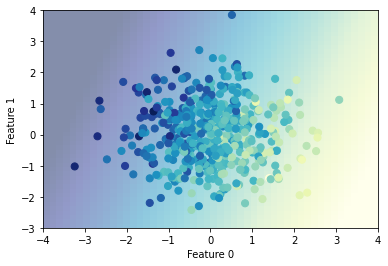

In [6]:
# Viz scatterplot
fig, ax = plt.subplots()
pts = ax.scatter(x0, x1, c=y, s=50, cmap='YlGnBu', zorder=2)
# Compute model color mesh
xx0, xx1 = np.meshgrid(np.linspace(-4, 4),
                       np.linspace(-3, 4))
X_fitted = np.vstack([xx0.ravel(), xx1.ravel()]).T
y_fitted = ols.predict(X_fitted)
yy = y_fitted.reshape(xx0.shape)
# Plot hyperplane
ax.pcolorfast([-4, 4], [-3, 4], yy, alpha=0.5, cmap='YlGnBu', norm=pts.norm, zorder=1)
ax.set(xlabel='Feature 0', ylabel='Feature 1')

[Text(0.5, 0, 'Feature 0'), Text(0.5, 0, 'Feature 1')]

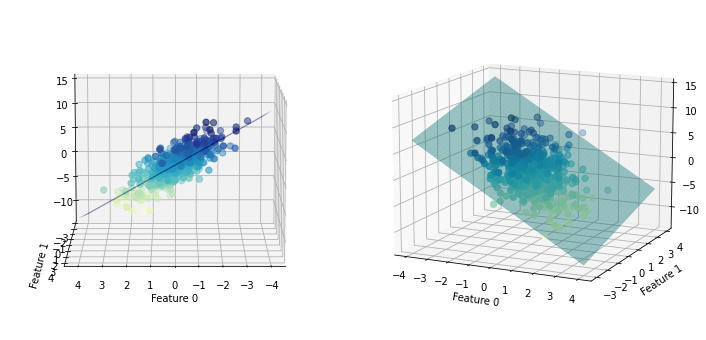

In [7]:
# Plot 3D
fig = plt.figure(figsize=(16, 6))
fig.subplots_adjust(left=0, right=0.6, wspace=0.1)
# fig1
ax = fig.add_subplot(121, projection='3d')
ax.scatter(x0, x1, y, c=y, s=40,cmap='YlGnBu')
ax.plot_surface(xx0, xx1, yy, color='b', alpha=.4)
ax.view_init(10, 90)
ax.set(xlabel='Feature 0', ylabel='Feature 1')
# fig2
ax = fig.add_subplot(122, projection='3d')
ax.scatter(x0, x1, y, c=y, s=40,cmap='YlGnBu')
ax.plot_surface(xx0, xx1, yy, color='c', alpha=.4)
ax.view_init(13, -65)
ax.set(xlabel='Feature 0', ylabel='Feature 1')

**Predict on test data & visualize results.** With the trained model at hand we proceed to see what response it predicts in a new data sample.

In [8]:
# Predict on test data
y_predicted = ols.predict(X_test)

[Text(0.5, 1.0, 'Predicted Response')]

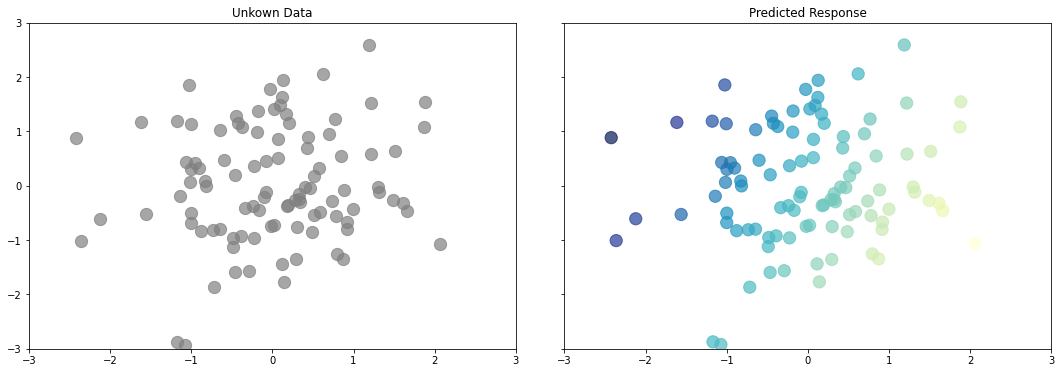

In [9]:
# Plot model prediction
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# fig1
ax[0].scatter(x0_test, x1_test, c='gray', s=150, alpha=.7)
ax[0].axis([-3, 3, -3, 3])
ax[0].set(title='Unkown Data')
# fig2
ax[1].scatter(x0_test, x1_test, c=y_predicted, s=150, alpha=.7, cmap='YlGnBu')
ax[1].set(title='Predicted Response')